In [130]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib inline


# import pandas as pd
# import matplotlib.pyplot as plt
# import matplotlib as mpl
# import numpy as np
# import seaborn as sns

In [70]:
red_wine = pd.read_csv('wine-quality/winequality-red.csv',delimiter=';')
white_wine = pd.read_csv('wine-quality/winequality-white.csv',delimiter=';')

In [71]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Category wine quality level and combine and shuffle data 

In [72]:
red_wine['wine_type'] = 'red'
white_wine['wine_type'] = 'white'

red_wine['quality_label'] = red_wine['quality'].apply(lambda val: 'low' if val <=5 else 'medium' if val <=7 else 'high') 
white_wine['quality_label'] = white_wine['quality'].apply(lambda val: 'low' if val <=5 else 'medium' if val <=7 else 'high')

red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'], categories=['low', 'medium', 'high'])
white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'], categories=['low', 'medium', 'high'])
wines = pd.concat([red_wine, white_wine])
wines = wines.sample(frac=1, random_state=42).reset_index(drop=True)

In [73]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,white,high
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,red,low
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,white,medium
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,white,medium
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,white,medium


## Statistic Basic features

In [74]:
subset_attributes = ['residual sugar', 'total sulfur dioxide', 'sulphates',
'alcohol', 'volatile acidity', 'quality']

rs = round(red_wine[subset_attributes].describe(), 2)
ws = round(white_wine[subset_attributes].describe(), 2)

pd.concat([rs, ws], axis=1, keys=['Red Wine Statics', 'White Wine Statics'])

Red Wine Statics                                          \
        residual sugar total sulfur dioxide sulphates  alcohol   
count          1599.00              1599.00   1599.00  1599.00   
mean              2.54                46.47      0.66    10.42   
std               1.41                32.90      0.17     1.07   
min               0.90                 6.00      0.33     8.40   
25%               1.90                22.00      0.55     9.50   
50%               2.20                38.00      0.62    10.20   
75%               2.60                62.00      0.73    11.10   
max              15.50               289.00      2.00    14.90   

                                White Wine Statics                       \
      volatile acidity  quality     residual sugar total sulfur dioxide   
count          1599.00  1599.00            4898.00              4898.00   
mean              0.53     5.64               6.39               138.36   
std               0.18     0.81               5.07                42.50   
min               0.12     3.00               0.60                 9.00   
25%               0.39     5.00               1.70               108.00   
50%               0.52     6.00               5.20               134.00   
75%               0.64     6.00               9.90               167.00   
max               1.58     8.00              65.80               440.00   

                                                    
      sulphates  alcohol volatile acidity  quality  
count   4898.00  4898.00          4898.00  4898.00  
mean       0.49    10.51             0.28     5.88  
std        0.11     1.23             0.10     0.89  
min        0.22     8.00             0.08     3.00  
25%        0.41     9.50             0.21     5.00  
50%        0.47    10.40             0.26     6.00  
75%        0.55    11.40             0.32     6.00  
max        1.08    14.20             1.10     9.00

# single variable anlysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000017AA51D0>,
      dtype=object)

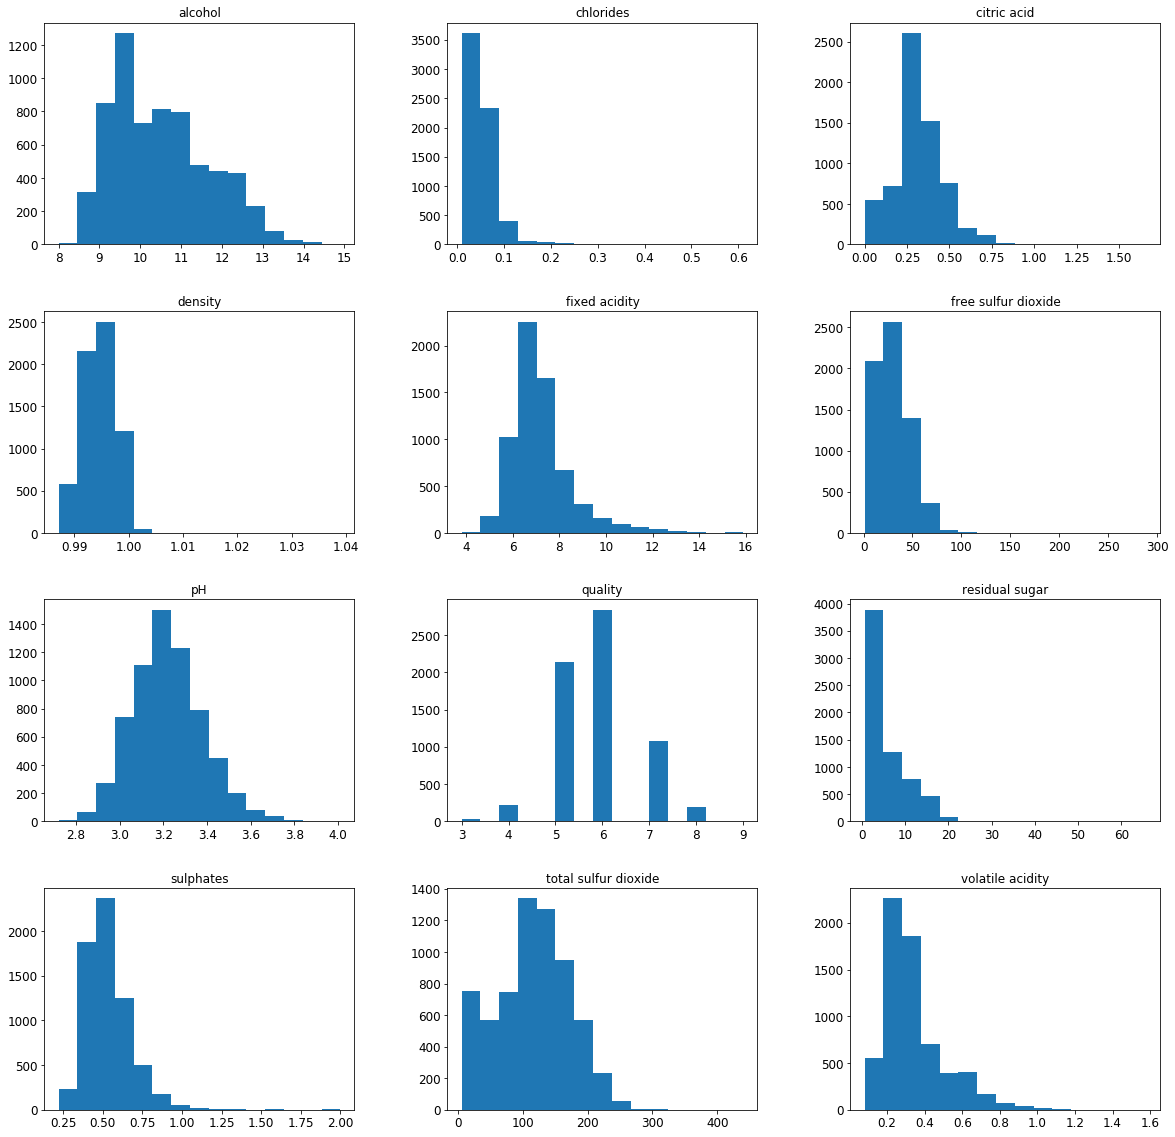

In [75]:
wines.hist(grid=False, bins=15, figsize=(20,20), xlabelsize=12, ylabelsize=12)

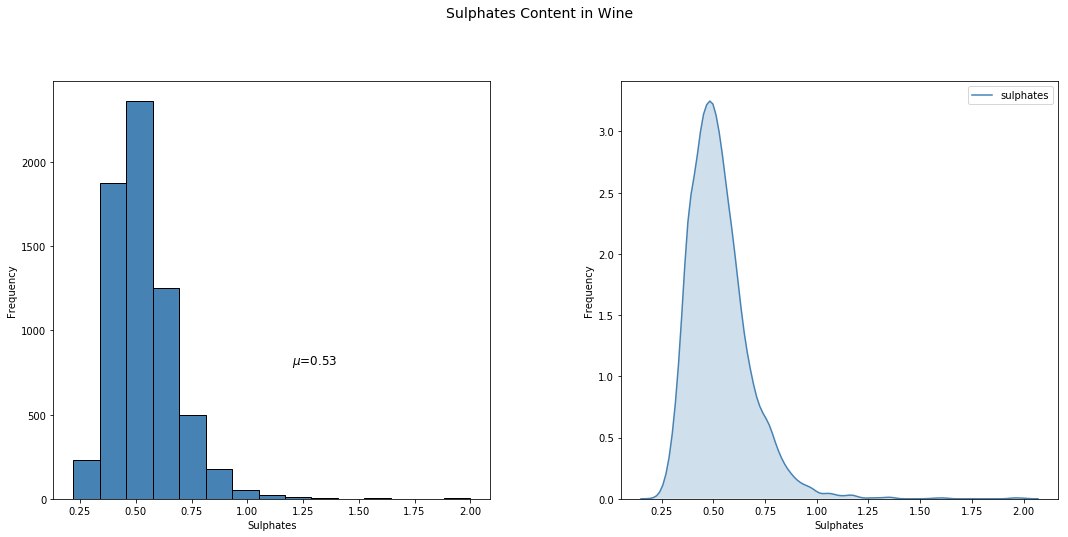

In [96]:
fig = plt.figure(figsize=(18,8))
fig.suptitle('Sulphates Content in Wine', fontsize=14 )
fig.subplots_adjust(top=0.85, wspace=0.3)
ax = fig.add_subplot(1,2,1)
ax.set_xlabel("Sulphates")
ax.set_ylabel("Frequency")
ax.text(1.2, 800, r'$\mu$='+str(round(wines['sulphates'].mean(),2)),fontsize=12)
freq, bins, patches = ax.hist(wines['sulphates'], color='steelblue', bins=15,edgecolor='black', linewidth=1)
ax1 = fig.add_subplot(1,2, 2)
ax1.set_xlabel("Sulphates")
ax1.set_ylabel("Frequency")
sns.kdeplot(wines['sulphates'], ax=ax1, shade=True, color='steelblue')

# Multiple Variable Analysis 

### 2-D

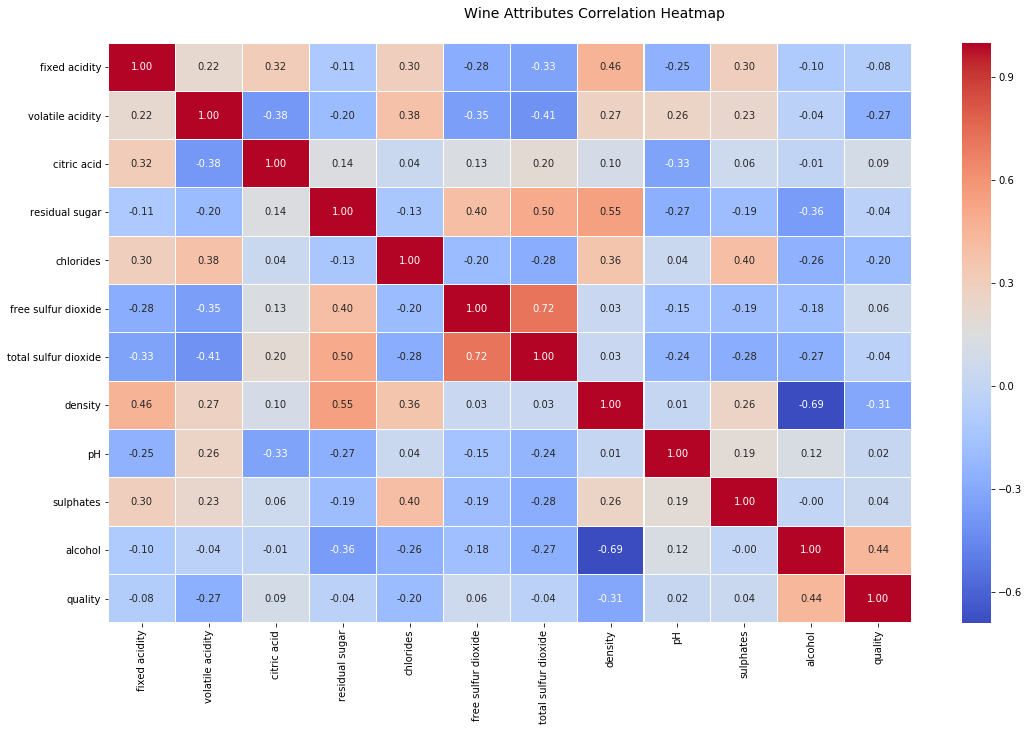

In [107]:
# Correlation Matrix Heatmap
fig, ax = plt.subplots(figsize=(18, 10))
corr = wines.corr()
hm = sns.heatmap(round(corr, 2), annot=True, ax=ax, cmap="coolwarm", fmt=".2f", linewidth=.05)
fig.suptitle('Wine Attributes Correlation Heatmap', fontsize=14)
fig.subplots_adjust(top=0.93)

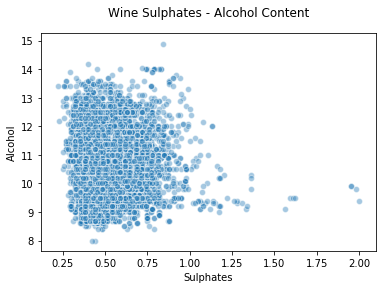

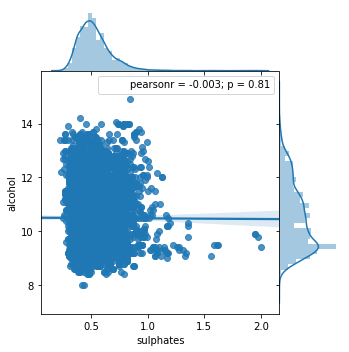

In [113]:
plt.scatter(wines['sulphates'], wines['alcohol'], alpha=0.4, edgecolors='w')
plt.xlabel('Sulphates')
plt.ylabel('Alcohol')
plt.title('Wine Sulphates - Alcohol Content',y=1.05)

# Joint Plot
jp = sns.jointplot(x='sulphates', y='alcohol', data=wines,
kind='reg', space=0, size=5, ratio=4)


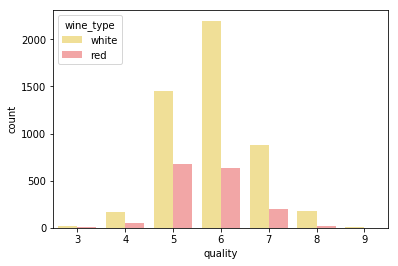

In [125]:
# Multi-bar Plot
cp = sns.countplot(x="quality", hue="wine_type", data=wines,palette={"red": "#FF9999", "white": "#FFE888"})

Text(0,0.5,'Wine Alcohol %')

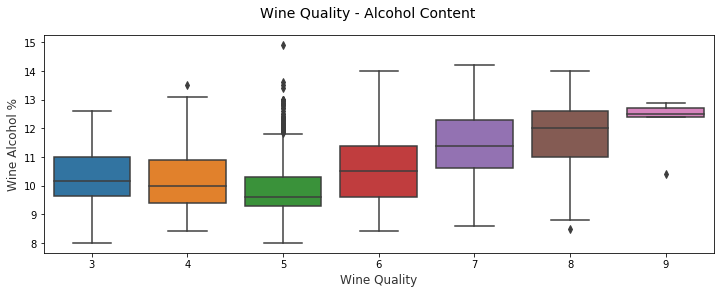

In [126]:
f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('Wine Quality - Alcohol Content', fontsize=14)

sns.boxplot(x="quality", y="alcohol", data=wines, ax=ax)
ax.set_xlabel("Wine Quality",size = 12,alpha=0.8)
ax.set_ylabel("Wine Alcohol %",size = 12,alpha=0.8)

Text(0,0.5,'Wine Sulphates')

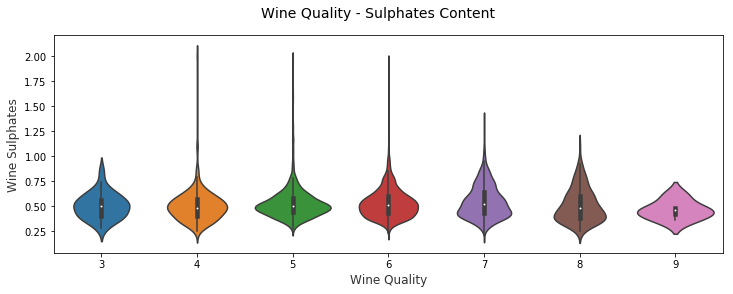

In [127]:
# Violin Plots
f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('Wine Quality - Sulphates Content', fontsize=14)

sns.violinplot(x="quality", y="sulphates", data=wines, ax=ax)
ax.set_xlabel("Wine Quality",size = 12,alpha=0.8)
ax.set_ylabel("Wine Sulphates",size = 12,alpha=0.8)

# 3-D Visualizing

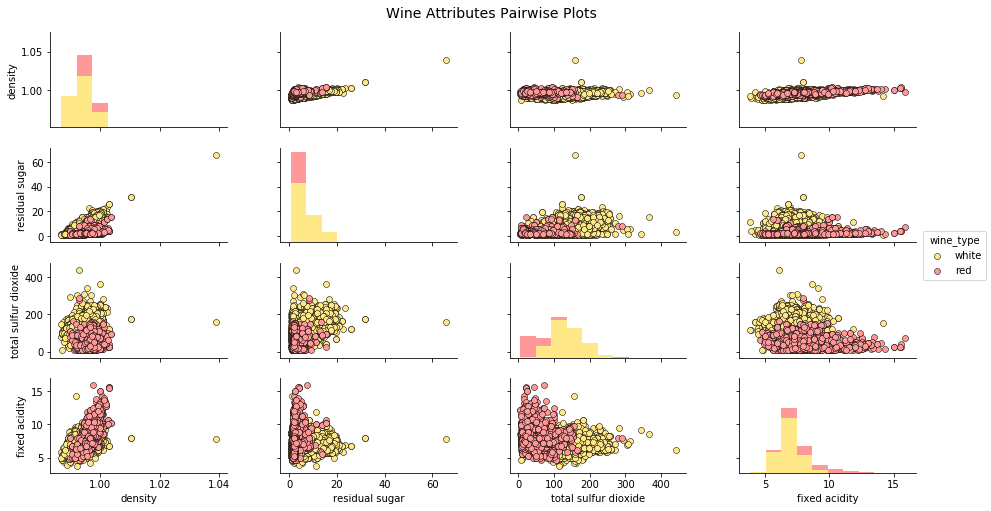

In [128]:
# Scatter Plot with Hue for visualizing data in 3-D
cols = ['density', 'residual sugar', 'total sulfur dioxide', 'fixed acidity', 'wine_type']
pp = sns.pairplot(wines[cols], hue='wine_type', size=1.8, aspect=1.8,
                  palette={"red": "#FF9999", "white": "#FFE888"},
                  plot_kws=dict(edgecolor="black", linewidth=0.5))
fig = pp.fig
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Wine Attributes Pairwise Plots', fontsize=14)

Text(0.5,0,'Alcohol')

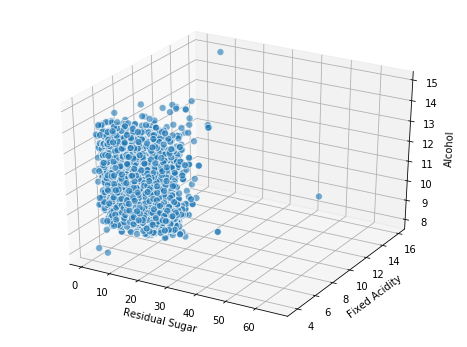

In [131]:
# Visualizing 3-D numeric data with Scatter Plots
# length, breadth and depth
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = wines['residual sugar']
ys = wines['fixed acidity']
zs = wines['alcohol']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('Residual Sugar')
ax.set_ylabel('Fixed Acidity')
ax.set_zlabel('Alcohol')

Text(0.5,1.05,'Wine Alcohol Content - Fixed Acidity - Residual Sugar')

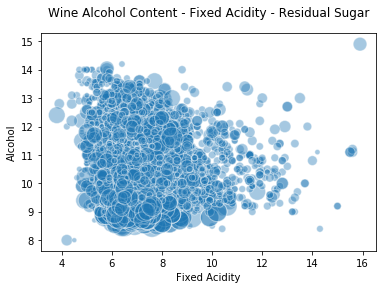

In [132]:
# Visualizing 3-D numeric data with a bubble chart
# length, breadth and size
plt.scatter(wines['fixed acidity'], wines['alcohol'], s=wines['residual sugar']*25,
alpha=0.4, edgecolors='w')

plt.xlabel('Fixed Acidity')
plt.ylabel('Alcohol')
plt.title('Wine Alcohol Content - Fixed Acidity - Residual Sugar',y=1.05)

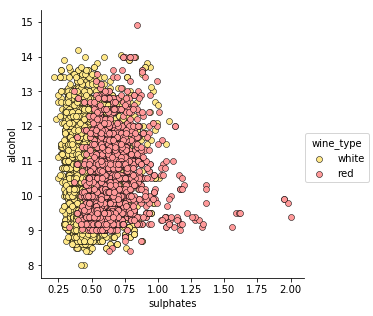

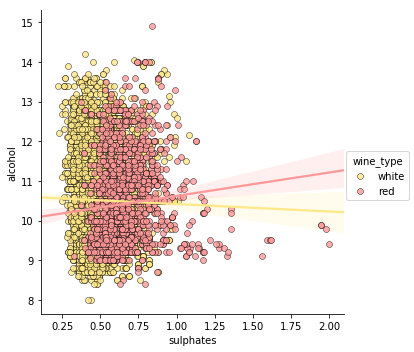

In [133]:
# Visualizing 3-D mix data using scatter plots
# leveraging the concepts of hue for categorical dimension
jp = sns.pairplot(wines, x_vars=["sulphates"], y_vars=["alcohol"], size=4.5,
hue="wine_type", palette={"red": "#FF9999", "white": "#FFE888"},
plot_kws=dict(edgecolor="k", linewidth=0.5))

# we can also view relationships\correlations as needed
lp = sns.lmplot(x='sulphates', y='alcohol', hue='wine_type',
palette={"red": "#FF9999", "white": "#FFE888"},
data=wines, fit_reg=True, legend=True,
scatter_kws=dict(edgecolor="k", linewidth=0.5))

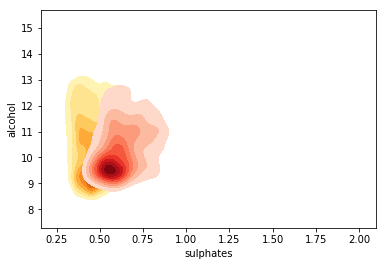

In [134]:
# Visualizing 3-D mix data using kernel density plots
# leveraging the concepts of hue for categorical dimension
ax = sns.kdeplot(white_wine['sulphates'], white_wine['alcohol'],
cmap="YlOrBr", shade=True, shade_lowest=False)
ax = sns.kdeplot(red_wine['sulphates'], red_wine['alcohol'],
cmap="Reds", shade=True, shade_lowest=False)

# 4-D

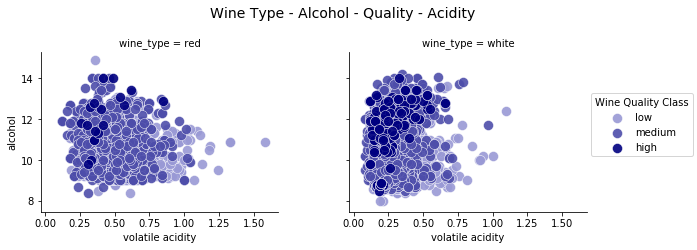

In [135]:
# Visualizing 4-D mix data using scatter plots
# leveraging the concepts of hue and facets for > 1 categorical attributes
g = sns.FacetGrid(wines, col="wine_type", hue='quality_label',
col_order=['red', 'white'], hue_order=['low', 'medium', 'high'],
aspect=1.2, size=3.5, palette=sns.light_palette('navy', 4)[1:])
g.map(plt.scatter, "volatile acidity", "alcohol", alpha=0.9,
edgecolor='white', linewidth=0.5, s=100)
fig = g.fig
fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle('Wine Type - Alcohol - Quality - Acidity', fontsize=14)
l = g.add_legend(title='Wine Quality Class')